# Diplomatura en **Business Analytics** - FCEJ/UdA - **Serie de tiempo**

***Serie no estacional/Modelo SARIMA***

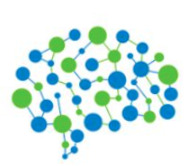

**Ejercicio Nº23**  Retomando el caso de los afiliados del ejercicio de regresión lineal; el dueño está interesado ahora en poder predecir cuántos afiliados va a tener en el próximo año , para poder determinar si va  a tener los suficientes afiliados para poder cubrir los costos. Las observaciones van a ser en forma mensual.

In [ ]:
#-------------------------------------------------------------------------------
#Instalar librerias
#-------------------------------------------------------------------------------

install.packages("forecast")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘xts’, ‘TTR’, ‘quadprog’, ‘quantmod’, ‘fracdiff’, ‘lmtest’, ‘timeDate’, ‘tseries’, ‘urca’, ‘zoo’, ‘RcppArmadillo’




In [ ]:
#-----------------------------------------------------------------------------------------
#Cargar librerias
#----------------------------------------------------------------------------------------

library(forecast)

1.Transformar los datos en datos ts y graficar

In [ ]:
datos=c(30,60,70,120,160,170,100, 230,200,160,180, 120, 80, 130,120,80,170, 110, 110,160,100, 80,
        90,50,110,100,80,100,70,120,100, 110,70, 80,100, 70, 130, 140,100, 110, 100,  140,140,140,
        120, 140,130,130,120, 110,120,130,120,110,120,110, 140, 160, 90, 60, 90, 90,100,130, 100,
        90, 90,90,80, 70, 60, 60, 90,120, 110,140,150, 150, 120,120,  130, 120,130, 150, 120,120,
        110,140,150,150, 120,120, 130,120, 130, 150,110,80,80,110,130,120, 140, 150,170,170,120,
        90, 80, 120,170,170,190,200,170, 140,110,140, 160,190,170,130,210,180,160, 210, 190, 190,
        150,200,200,210, 220, 280,170,200,240, 200, 200, 180, 210, 180, 180, 180, 160, 170, 170,
        150,150,170,180,170,220,260,200,190,150,130,120,110,70,80, 100,90,140,110, 110,110,60,70,
        90, 100,100,70,90,80,120, 60,70,70,50,50,80,60, 70,40,60,40, 50,50,60, 50, 60,  80)

In [ ]:
#--------------------------------------------------------------------------------------
#Transformar los datos en ts

datos.ts = ts(datos, start = c(2005,1), frequency = 12)

datos.ts



,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
2005,30,60,70,120,160,170,100,230,200,160,180,120
2006,80,130,120,80,170,110,110,160,100,80,90,50
2007,110,100,80,100,70,120,100,110,70,80,100,70
2008,130,140,100,110,100,140,140,140,120,140,130,130
2009,120,110,120,130,120,110,120,110,140,160,90,60
2010,90,90,100,130,100,90,90,90,80,70,60,60
2011,90,120,110,140,150,150,120,120,130,120,130,150
2012,120,120,110,140,150,150,120,120,130,120,130,150
2013,110,80,80,110,130,120,140,150,170,170,120,90
2014,80,120,170,170,190,200,170,140,110,140,160,190


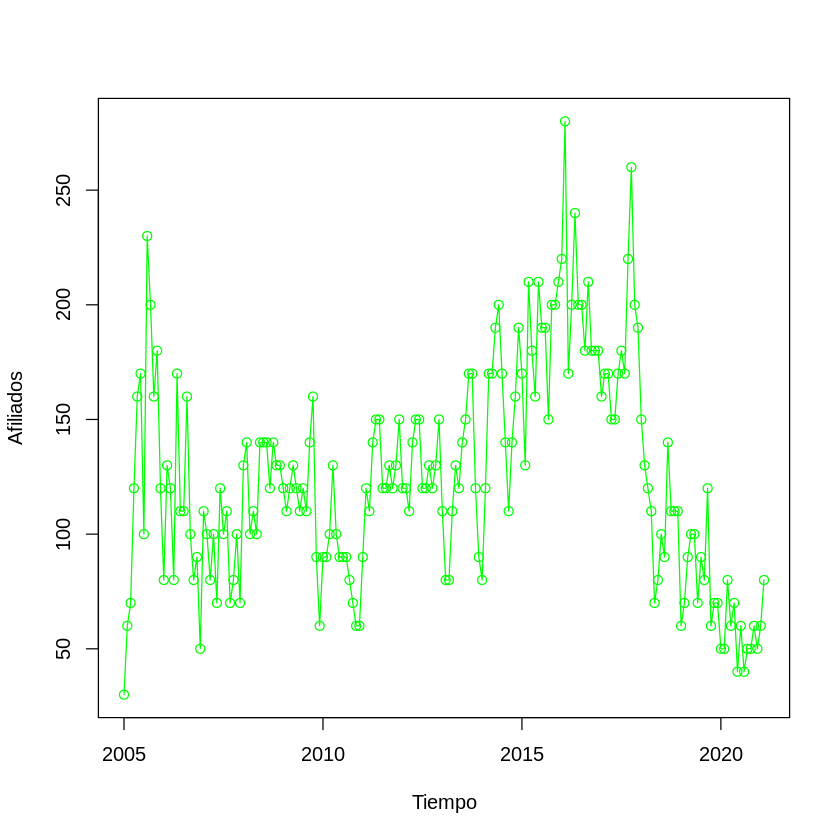

In [ ]:

plot(datos.ts, ylab="Afiliados", xlab="Tiempo" ,type="o",lwd=1,pch=1,cex=1,col="Green")

2.Transformar los datos en logaritmo (Cuando se trabaja con datos reales se debe usar siempre logaritmo)

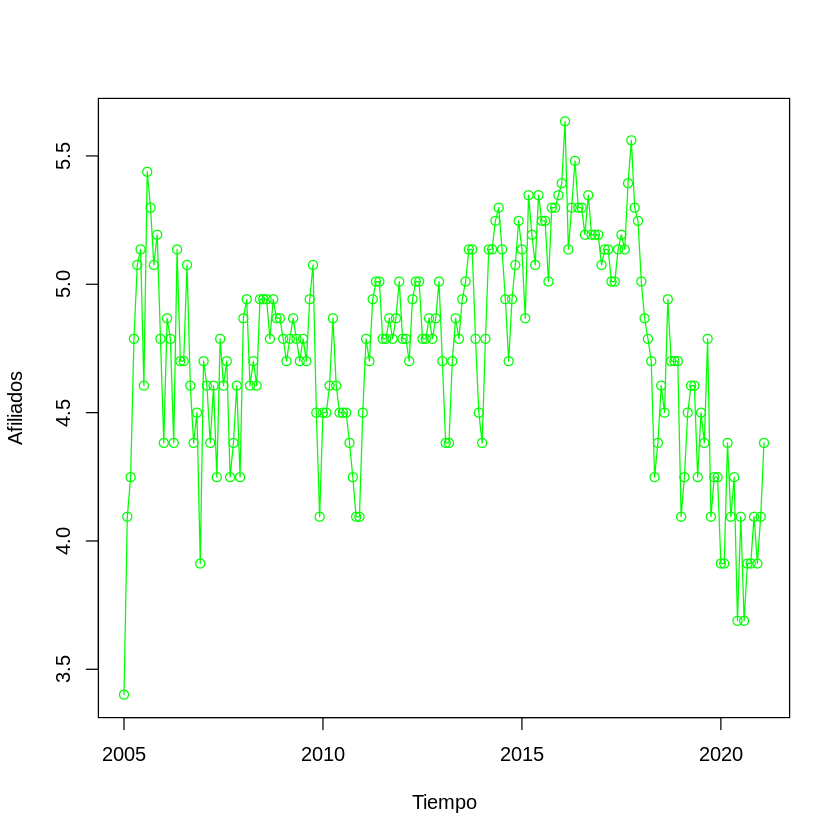

In [ ]:
datos.ts = log(datos.ts)
plot(datos.ts, ylab="Afiliados", xlab="Tiempo" ,type="o",lwd=1,pch=1,cex=1,col="Green")

3.Construir el gráfico de caja y bigotes en función de los meses, para observar si existe estacionalidad

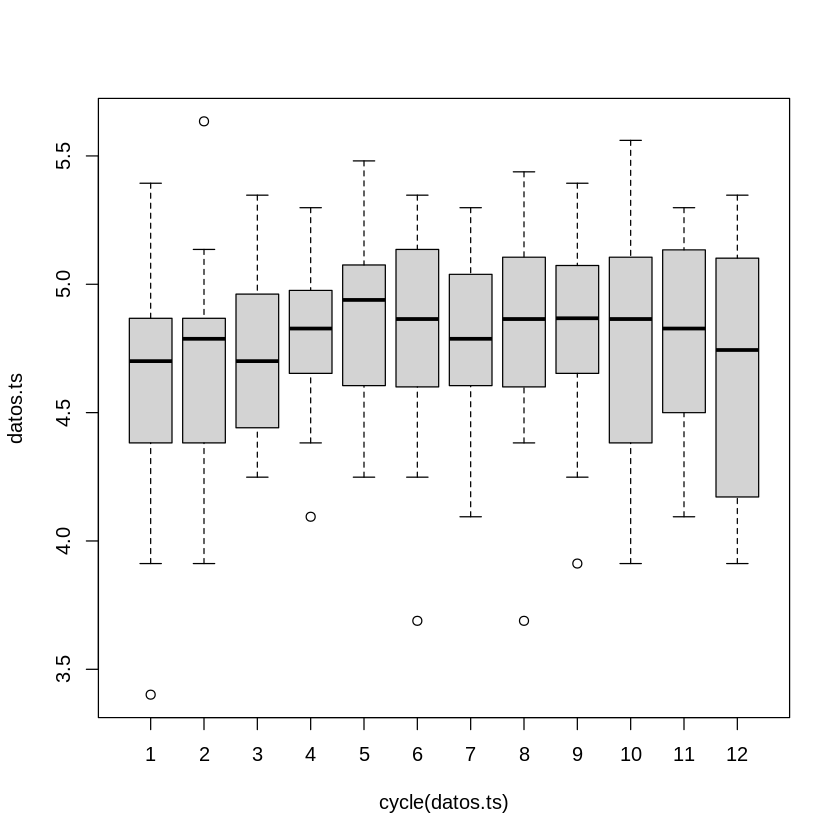

In [ ]:
boxplot(datos.ts ~ cycle(datos.ts))

4.Descomponer la serie en tendencia, estacionalidad y serie estacional

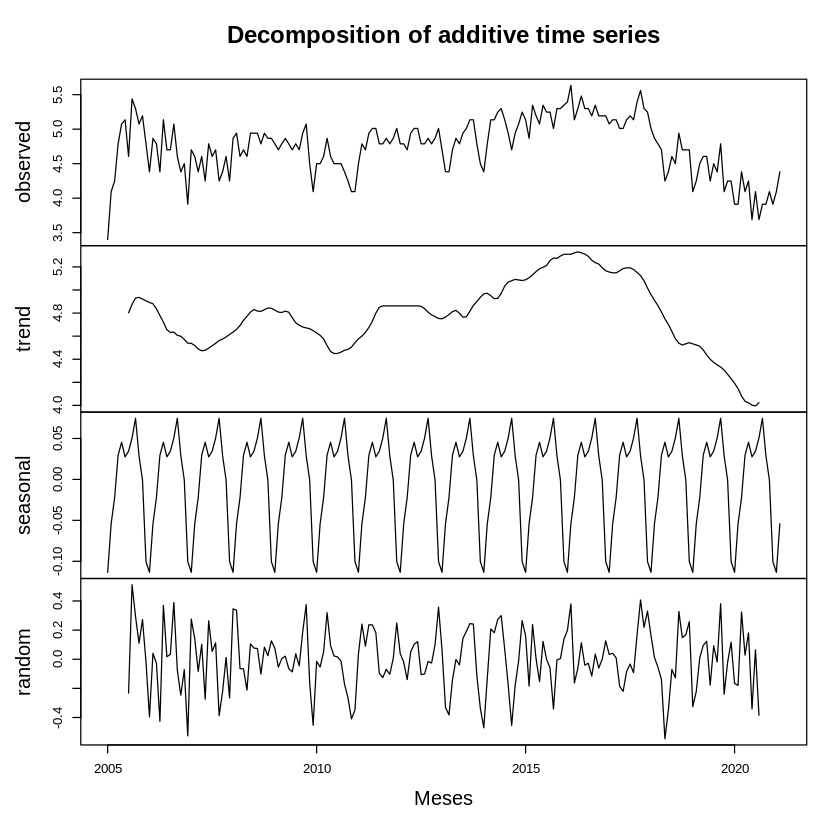

In [ ]:
datos.ts.desc = decompose(datos.ts)
plot(datos.ts.desc, xlab='Meses')

5.Estimar el modelo SARIMA

In [ ]:
fit=auto.arima(datos.ts,seasonal = T,ic = c("aicc"), stepwise=T, allowdrift = T)
summary(fit)

Series: datos.ts 
ARIMA(2,1,2)(2,0,0)[12] 

Coefficients:
         ar1     ar2      ma1     ma2    sar1     sar2
      0.6420  0.0989  -1.0426  0.1109  0.2479  -0.1450
s.e.  0.2487  0.5174   0.2708  0.4056  0.0825   0.1431

sigma^2 estimated as 0.06036:  log likelihood=-0.61
AIC=15.21   AICc=15.82   BIC=38.05

Training set error measures:
                      ME      RMSE       MAE         MPE     MAPE      MASE
Training set 0.007831818 0.2412187 0.1885733 -0.03044435 4.047124 0.6070208
                   ACF1
Training set 0.03327546


6.Hacer la predicción a 12 meses con sus respectivos intervalos de confianza

         Point Forecast    Lo 80    Hi 80    Lo 95    Hi 95
Mar 2021       4.344498 4.029631 4.659365 3.862951 4.826045
Apr 2021       4.249728 3.882639 4.616817 3.688314 4.811142
May 2021       4.271067 3.864914 4.677219 3.649910 4.892223
Jun 2021       4.172402 3.738830 4.605973 3.509311 4.835492
Jul 2021       4.227339 3.772907 4.681770 3.532346 4.922331
Aug 2021       4.136870 3.665855 4.607884 3.416515 4.857224
Sep 2021       4.127981 3.643252 4.612710 3.386652 4.869310
Oct 2021       4.224329 3.727877 4.720781 3.465071 4.983587
Nov 2021       4.243965 3.737208 4.750722 3.468947 5.018982
Dec 2021       4.196287 3.680259 4.712315 3.407091 4.985484
Jan 2022       4.288378 3.763846 4.812909 3.486175 5.090580
Feb 2022       4.358233 3.825777 4.890689 3.543912 5.172555

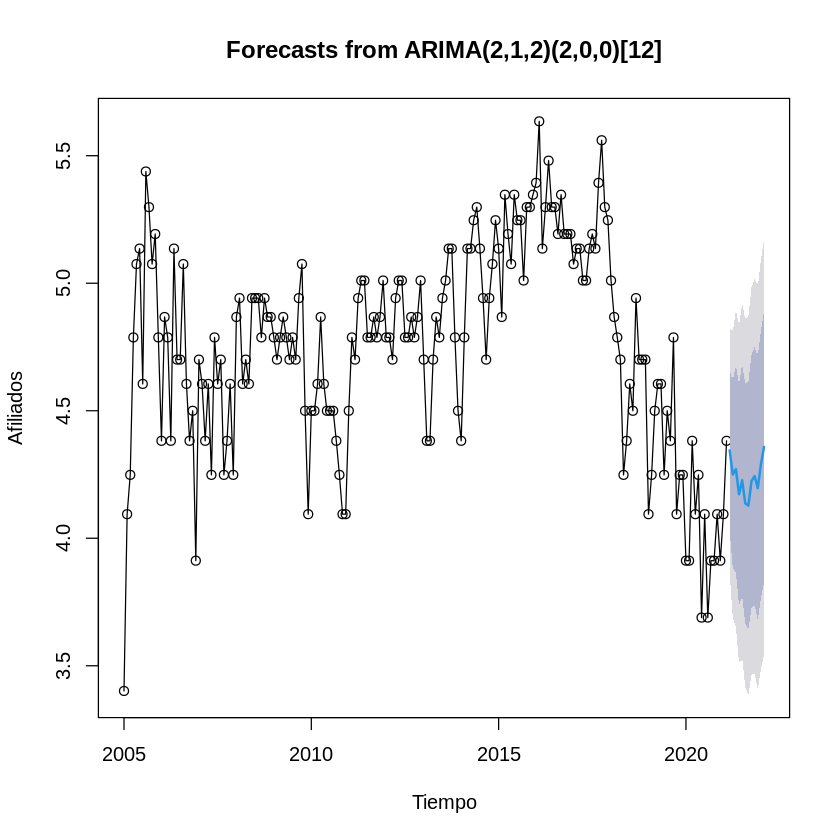

In [ ]:
#---------------------------------------------------------------------------------
plot(forecast(fit, h=12),ylab="Afiliados", xlab="Tiempo",type="o",lwd=1,pch=1,cex=1)
forecast(fit, h=12)

7.Invertir el logaritmo

In [ ]:
predic.log=forecast(fit, h=12)

exp(predic.log$mean)
exp(predic.log$lower)
exp(predic.log$upper)


,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
2021,,,77.05335,70.08635,71.59798,64.87107,68.53459,62.60653,62.05251,68.32864,69.68359,66.43920
2022,72.84818,78.11901,,,,,,,,,,


,80%,95%
Mar 2021,56.24016,47.60561
Apr 2021,48.55218,39.97738
May 2021,47.69919,38.47122
Jun 2021,42.04878,33.42524
Jul 2021,43.50636,34.20410
Aug 2021,39.08956,30.46308
Sep 2021,38.21591,29.56680
Oct 2021,41.59071,31.97873
Nov 2021,41.98063,32.10293
Dec 2021,39.65668,30.17732


,80%,95%
Mar 2021,105.5690,124.7168
Apr 2021,101.1715,122.8719
May 2021,107.4708,133.2495
Jun 2021,100.0804,125.9005
Jul 2021,107.9610,137.3224
Aug 2021,100.2717,128.6665
Sep 2021,100.7568,130.2310
Oct 2021,112.2559,145.9971
Nov 2021,115.6677,151.2573
Dec 2021,111.3096,146.2743
